In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleaning 

### Data Reading & Data Types 

In [119]:
applications=pd.read_csv("application_data.csv")
applications.shape

(307511, 122)

In [121]:
# Printing the information about the attributes of applications
applications.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [122]:
#Describing applications
applications.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

#### Finding
Average income is 168797

In [123]:
pd.set_option('display.max_columns', None)

### Fixing the Rows and Columns 

#### Handling missngs values 

In [124]:
#Find percentage of missing values for all columns
percent_missing = applications.isnull().sum() * 100 / len(applications)
percent_missing

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

#### Dropping columns with higher percentage of missngs values 

In [125]:
#Function to drop columns with more than 30% missing values
def dropColumns() :
    DropColList = []
    percent_missing = applications.isnull().sum() * 100 / len(applications)
    for i in range(0,percent_missing.size) :
            if percent_missing[i] > 30 :
                print("Dropping column :",applications.columns[i])
                DropColList.append(applications.columns[i])
    #print("DropColList :",DropColList)
    applications.drop(DropColList, axis=1,inplace=True)
                
dropColumns()

Dropping column : OWN_CAR_AGE
Dropping column : OCCUPATION_TYPE
Dropping column : EXT_SOURCE_1
Dropping column : APARTMENTS_AVG
Dropping column : BASEMENTAREA_AVG
Dropping column : YEARS_BEGINEXPLUATATION_AVG
Dropping column : YEARS_BUILD_AVG
Dropping column : COMMONAREA_AVG
Dropping column : ELEVATORS_AVG
Dropping column : ENTRANCES_AVG
Dropping column : FLOORSMAX_AVG
Dropping column : FLOORSMIN_AVG
Dropping column : LANDAREA_AVG
Dropping column : LIVINGAPARTMENTS_AVG
Dropping column : LIVINGAREA_AVG
Dropping column : NONLIVINGAPARTMENTS_AVG
Dropping column : NONLIVINGAREA_AVG
Dropping column : APARTMENTS_MODE
Dropping column : BASEMENTAREA_MODE
Dropping column : YEARS_BEGINEXPLUATATION_MODE
Dropping column : YEARS_BUILD_MODE
Dropping column : COMMONAREA_MODE
Dropping column : ELEVATORS_MODE
Dropping column : ENTRANCES_MODE
Dropping column : FLOORSMAX_MODE
Dropping column : FLOORSMIN_MODE
Dropping column : LANDAREA_MODE
Dropping column : LIVINGAPARTMENTS_MODE
Dropping column : LIVINGA

In [126]:
applications.shape

(307511, 72)

In [127]:
applications.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 72, dtype: int64

#### Imputing missing values
1. AMT_ANNUITY missing values are  replaced by mean of AMT_CREDIT/AMT_ANNUITY
2. AMT_GOODS_PRICE missing values are replaced by AMT_CREDIT value as in most of the cases AMT_GOODS_PRICE and AMT_CREDIT are same.
3. NAME_TYPE_SUITE is categorical type. Missing values are replaced by adding 1 more category as "Others"
4. CNT_FAM_MEMBERS contains only 2 missing values and replaced by 0

In [128]:
print((applications['AMT_CREDIT']/applications['AMT_ANNUITY']).median())
print((applications['AMT_CREDIT']/applications['AMT_ANNUITY']).mean())

20.0
21.612322404361525


In [129]:
#Subset of dataset is created before modifying the actual dataset
application_data = applications

In [130]:
application_data.shape

(307511, 72)

In [131]:
#Replacing the missing AMT_ANNUITY with median i.e 20
application_data["AMT_ANNUITY"].fillna(20, inplace = True)

In [132]:
print((application_data['AMT_CREDIT']-application_data['AMT_GOODS_PRICE']).median())
print((application_data['AMT_CREDIT']-application_data['AMT_GOODS_PRICE']).mean())

39204.0
60918.796804054255


In [133]:
application_data[application_data['AMT_CREDIT']-application_data['AMT_GOODS_PRICE']==0]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,0.714279,0.540654,2.0,0.0,2.0,0.0,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.022800,-10197,-679,-4427.0,-738,1,1,0,1,0,0,3.0,2,2,SATURDAY,15,0,0,0,0,0,0,Medicine,0.651862,0.363945,0.0,0.0,0.0,0.0,-844.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307496,456240,0,Revolving loans,F,N,N,0,360000.0,337500.0,16875.0,337500.0,Family,Working,Higher education,Married,House / apartment,0.004960,-17345,-2178,-4262.0,-876,1,1,0,1,0,0,2.0,2,2,THURSDAY,13,0,0,0,0,0,0,Self-employed,0.512081,0.486653,0.0,0.0,0.0,0.0,-826.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
307499,456243,0,Cash loans,F,N,Y,0,81000.0,225000.0,12694.5,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.007020,-16988,-8694,-5396.0,-509,1,1,1,1,1,0,2.0,2,2,TUESDAY,15,0,0,0,0,0,0,Medicine,0.649123,0.206779,4.0,0.0,4.0,0.0,-1511.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,

In [134]:
#Replacing the missing AMT_GOODS_PRICE with AMT_CREDIT 
application_data["AMT_GOODS_PRICE"].fillna(application_data['AMT_CREDIT'], inplace = True)  

In [135]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [136]:
#Replacing the missing NAME_TYPE_SUITE with "Others"
application_data["NAME_TYPE_SUITE"].fillna("Others", inplace = True)  

In [137]:
application_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Others               1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [138]:
application_data['CNT_FAM_MEMBERS'].value_counts()

2.0     158357
1.0      67847
3.0      52601
4.0      24697
5.0       3478
6.0        408
7.0         81
8.0         20
9.0          6
10.0         3
14.0         2
16.0         2
12.0         2
20.0         2
11.0         1
13.0         1
15.0         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [139]:
application_data["CNT_FAM_MEMBERS"].fillna(0, inplace = True)  

In [140]:
application_data[application_data['CNT_FAM_MEMBERS'].isna()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


#### Converting days to years for fields
DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH

In [141]:
#Correct data type
#DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
application_data['AGE'] = abs(application_data['DAYS_BIRTH']/365)
application_data['YEARS_EMPLOYED'] = abs(application_data['DAYS_EMPLOYED']/365)
application_data['YEARS_REGISTRATION'] = abs(application_data['DAYS_REGISTRATION']/365)
application_data['YEARS_ID_PUBLISH'] = abs(application_data['DAYS_ID_PUBLISH']/365)

### Outliers
Reporting outliers for columns : AMT_INCOME_TOTAL, AMT_ANNUITY, AMT_GOODS_PRICE, AMT_CREDIT, AGE, YEARS_EMPLOYED, EXT_SOURCE_2

Income at 99th percentile 472500.0
Total Outliers 3014
Defaulter Outliers 162


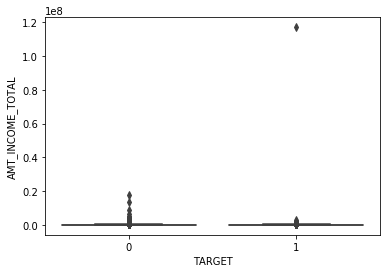

In [142]:
#AMT_INCOME_TOTAL
sns.boxplot(data=application_data,y='AMT_INCOME_TOTAL',x='TARGET')
print("Income at 99th percentile",np.nanpercentile(application_data.AMT_INCOME_TOTAL, 99))
print("Total Outliers",len(application_data[application_data['AMT_INCOME_TOTAL']>np.nanpercentile(application_data.AMT_INCOME_TOTAL, 99)]))
print("Defaulter Outliers",len(application_data[(application_data['AMT_INCOME_TOTAL']>np.nanpercentile(application_data.AMT_INCOME_TOTAL, 99)) & (application_data['TARGET']==1)]))

#### Outcome
1. Income at 99th percentile is 472500.0
There are total 3014 rows with outliers, out of which 162 are defaulters

2. Max salary 117000000 seems invalid and it is also a defaulter.

Annuity at 99th percentile 70006.5
Total Outliers 3070
Defaulter Outliers 114


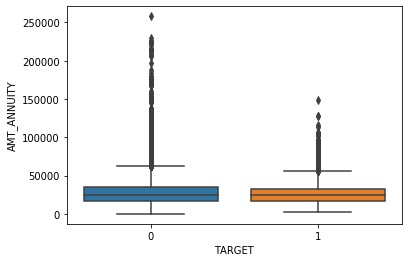

In [143]:
#AMT_ANNUITY
sns.boxplot(data=application_data,y='AMT_ANNUITY',x='TARGET')
print("Annuity at 99th percentile",np.nanpercentile(application_data.AMT_ANNUITY, 99))
print("Total Outliers",len(application_data[application_data['AMT_ANNUITY']>np.nanpercentile(application_data.AMT_ANNUITY, 99)]))
print("Defaulter Outliers",len(application_data[(application_data['AMT_ANNUITY']>np.nanpercentile(application_data.AMT_ANNUITY, 99)) & (application_data['TARGET']==1)]))

#### Outcome
Annuity at 99th percentile is 70006.5
There are total 3070 rows with outliers, out of which 114 are defaulters

AMT_GOODS_PRICE at 99th percentile 1800000.0
Total Outliers 1431
Defaulter Outliers 49


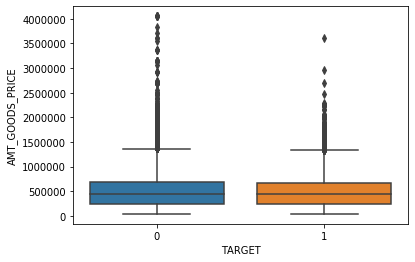

In [144]:
#AMT_GOODS_PRICE
sns.boxplot(data=application_data,y='AMT_GOODS_PRICE',x='TARGET')
print("AMT_GOODS_PRICE at 99th percentile",np.nanpercentile(application_data.AMT_GOODS_PRICE, 99))
print("Total Outliers",len(application_data[application_data['AMT_GOODS_PRICE']>np.nanpercentile(application_data.AMT_GOODS_PRICE, 99)]))
print("Defaulter Outliers",len(application_data[(application_data['AMT_GOODS_PRICE']>np.nanpercentile(application_data.AMT_GOODS_PRICE, 99)) & (application_data['TARGET']==1)]))
#1431 total
#49 with 1

#### Outcome
AMT_GOODS_PRICE at 99th percentile is 1800000
There are total 1431 rows with outliers, out of which 49 are defaulters

AMT_CREDIT at 99th percentile 1854000.0
Total Outliers 3075
Defaulter Outliers 124


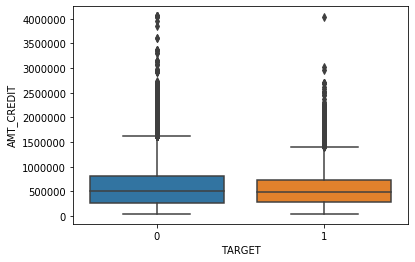

In [145]:
#AMT_CREDIT
sns.boxplot(data=application_data,y='AMT_CREDIT',x='TARGET')
print("AMT_CREDIT at 99th percentile",np.nanpercentile(application_data.AMT_CREDIT, 99))
print("Total Outliers",len(application_data[application_data['AMT_CREDIT']>np.nanpercentile(application_data.AMT_CREDIT, 99)]))
print("Defaulter Outliers",len(application_data[(application_data['AMT_CREDIT']>np.nanpercentile(application_data.AMT_CREDIT, 99)) & (application_data['TARGET']==1)]))

#### Outcome
AMT_CREDIT at 99th percentile is 1854000
There are total 3075 rows with outliers, out of which 124 are defaulters

AGE at 99th percentile 66.9013698630137
Total Outliers 3074
Defaulter Outliers 107


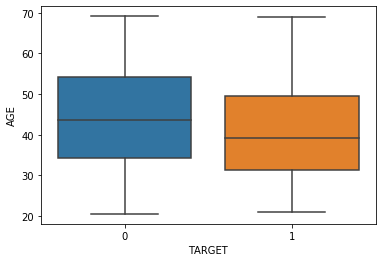

In [146]:
#AGE
sns.boxplot(data=application_data,y='AGE',x='TARGET')
print("AGE at 99th percentile",np.nanpercentile(application_data.AGE, 99))
print("Total Outliers",len(application_data[application_data['AGE']>np.nanpercentile(application_data.AGE, 99)]))
print("Defaulter Outliers",len(application_data[(application_data['AGE']>np.nanpercentile(application_data.AGE, 99)) & (application_data['TARGET']==1)]))

#### Outcome
AGE at 99th percentile is 66.9 There are total 3074 rows with outliers, out of which 107 are defaulters

YEARS_EMPLOYED at 99th percentile 1000.6657534246575
Total Outliers 55374
Defaulter Outliers 2990


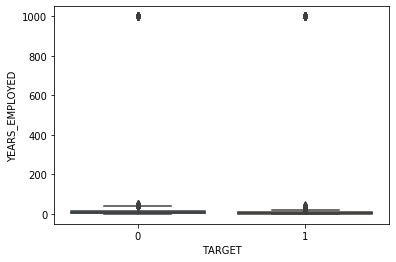

In [147]:
#YEARS_EMPLOYED
sns.boxplot(data=application_data,y='YEARS_EMPLOYED',x='TARGET')
print("YEARS_EMPLOYED at 99th percentile",np.nanpercentile(application_data.YEARS_EMPLOYED, 99))
print("Total Outliers",len(application_data[application_data['YEARS_EMPLOYED']>125]))
print("Defaulter Outliers",len(application_data[(application_data['YEARS_EMPLOYED']>125) & (application_data['TARGET']==1)]))

#### Outcome
YEARS_EMPLOYED at 99th percentile is 1000.67 There are total 55374 rows with outliers, out of which 2990 are defaulters

#### Observation
YEARS_EMPLOYED field contains value as 1000 years as value for a high percentage of data which is an invalid value in this case. So we can't perform our analysis based on YEARS_EMPLOYED field.

EXT_SOURCE_2 at 99th percentile 0.7827928199705348
Total Outliers 3068
Defaulter Outliers 57


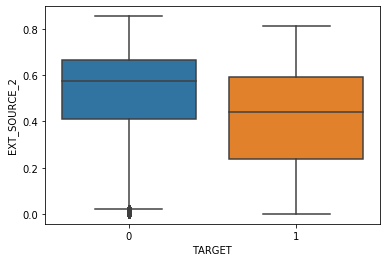

In [148]:
#EXT_SOURCE_2
sns.boxplot(data=application_data,y='EXT_SOURCE_2',x='TARGET')
print("EXT_SOURCE_2 at 99th percentile",np.nanpercentile(application_data.EXT_SOURCE_2, 99))
print("Total Outliers",len(application_data[application_data['EXT_SOURCE_2']>np.nanpercentile(application_data.EXT_SOURCE_2, 99)]))
print("Defaulter Outliers",len(application_data[(application_data['EXT_SOURCE_2']>np.nanpercentile(application_data.EXT_SOURCE_2, 99)) & (application_data['TARGET']==1)]))

#### Outcome
EXT_SOURCE_2 at 99th percentile is 0.78 There are total 3068 rows with outliers, out of which 57 are defaulters

### Binning columns
AMT_INCOME_TOTAL, AMT_CREDIT, AGE

In [149]:
#AMT_INCOME_TOTAL
quant = application_data.AMT_INCOME_TOTAL.quantile(q=[0,0.20,0.50,0.75,0.90,1]).values
application_data['Income_Intervals'] = pd.cut(application_data.AMT_INCOME_TOTAL, quant, labels=["Very-Low", "Low", "Avegare", "High","Very-High"])
application_data['Income_Intervals'].value_counts()

Low          90089
Avegare      82213
Very-Low     63669
High         44377
Very-High    27161
Name: Income_Intervals, dtype: int64

In [150]:
#AMT_CREDIT
quant = application_data.AMT_CREDIT.quantile(q=[0,0.20,0.50,0.75,0.90,1]).values
application_data['CREDIT_INTERVAL'] = pd.cut(application_data.AMT_CREDIT, quant, labels=["Very-Low", "Low", "Avegare", "High","Very-High"])
application_data['CREDIT_INTERVAL'].value_counts()

Low          88924
Avegare      77786
Very-Low     64695
High         45283
Very-High    30593
Name: CREDIT_INTERVAL, dtype: int64

In [151]:
#AGE
application_data['AGE_BINS'] = pd.cut(x=application_data['AGE'], bins=[20,29,39,49,59,70])
application_data['AGE_BINS'].value_counts()

(29, 39]    81214
(39, 49]    78670
(49, 59]    68065
(59, 70]    42214
(20, 29]    37348
Name: AGE_BINS, dtype: int64

### Checking Data Imbalance

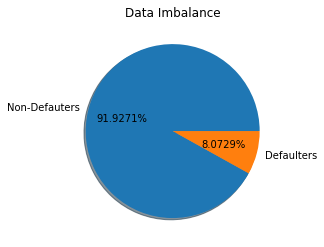

In [152]:
def my_fmt(x):
    return '{:.4f}%'.format(x, total*x/100)

mylabel = ['Non-Defauters','Defaulters']
v_counts = application_data['TARGET'].value_counts()
total = len(application_data['TARGET'])
fig = plt.figure()
plt.pie(v_counts, labels=mylabel, autopct=my_fmt, shadow=True)
plt.title('Data Imbalance')
plt.show()

### Dividing Applications into 2 dataframes
#### Defaulters and Non-defaulters

In [153]:
applications1 = application_data[application_data['TARGET']==1]
applications1.shape

(24825, 79)

In [154]:
applications0 = application_data[application_data['TARGET']==0]
applications0.shape

(282686, 79)

## Univariate Analysis

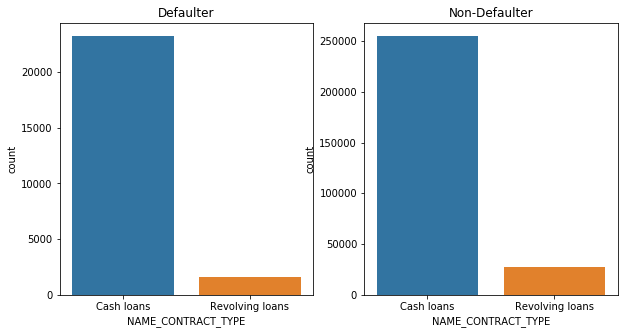

In [155]:
#Loan Type
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulter') 
sns.countplot(x="NAME_CONTRACT_TYPE",data=applications1)
plt.subplot(1,2,2)
plt.title('Non-Defaulter') 
sns.countplot(x="NAME_CONTRACT_TYPE",data=applications0)

#### Observation
Defaulter count is comparatively high for Cash Loans type than Revolving Loans

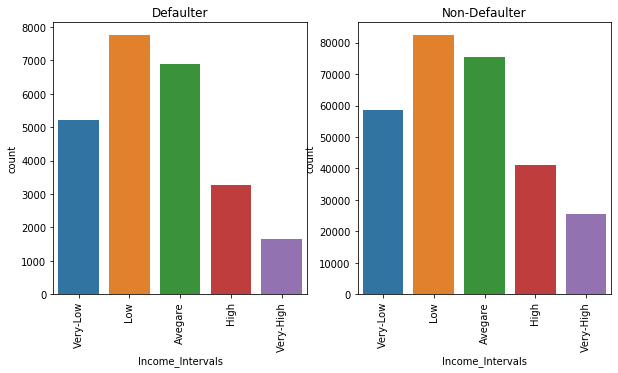

In [156]:
#Income_Intervals
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulter') 
sns.countplot(x="Income_Intervals",data=applications1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter') 
sns.countplot(x="Income_Intervals",data=applications0)
plt.xticks(rotation=90)
plt.show()

#### Observation
Percentage of people with higher income is low in defaulter that means person with higher salary has lesser chances of  becoming a defaulter.

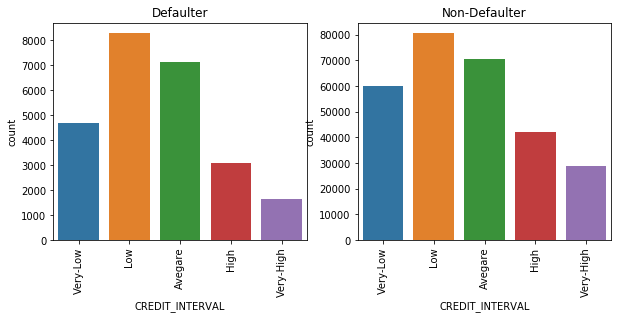

In [157]:
#CREDIT_INTERVAL
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Defaulter') 
sns.countplot(x="CREDIT_INTERVAL",data=applications1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter') 
sns.countplot(x="CREDIT_INTERVAL",data=applications0)
plt.xticks(rotation=90)
plt.show()

#### Observation
Percentage of people with higher credit is low in defaulter that means person with higher credit has lesser chances of  becoming a defaulter. But a defaulter person with high credit can make bigger loss to bank.

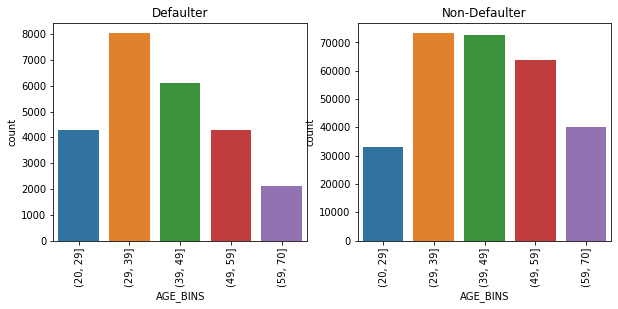

In [158]:
#AGE_BINS
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Defaulter') 
sns.countplot(x="AGE_BINS",data=applications1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter') 
sns.countplot(x="AGE_BINS",data=applications0)
plt.xticks(rotation=90)
plt.show()

#### Observation
Percentage of people with older age is low in defaulter that means old people are more reliable than young in terms of repaying loans. 

## Bivariate Analysis 

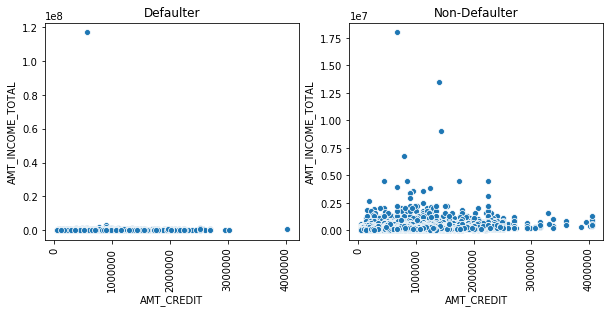

In [159]:
#AMT_INCOME_TOTAL VS AMT_CREDIT
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Defaulter') 
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=applications1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter') 
sns.scatterplot(x='AMT_CREDIT',y='AMT_INCOME_TOTAL',data=applications0)
plt.xticks(rotation=90)
plt.show()

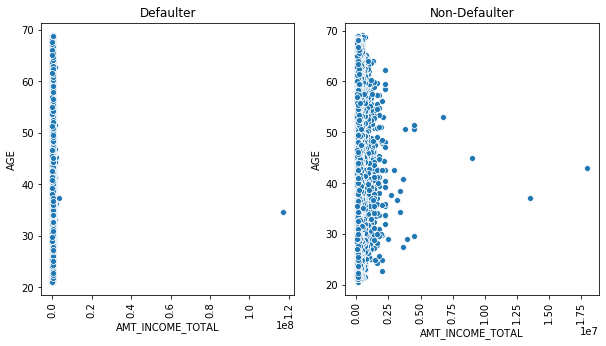

In [160]:
#AMT_INCOME_TOTAL VS AGE
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Defaulter') 
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AGE',data=applications1)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Non-Defaulter') 
sns.scatterplot(x='AMT_INCOME_TOTAL',y='AGE',data=applications0)
plt.xticks(rotation=90)
plt.show()

#### Observation
Income distribution is more for Non-Defualters for amount credit or age.

### Data Reading For Previous Applications

In [161]:
prev_app_data=pd.read_csv("previous_application.csv")

In [162]:
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [163]:
prev_app_data.shape

(1670214, 37)

### Merging Both Dataframes

In [164]:
merged_df = pd.merge(left=application_data,right=prev_app_data, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,Income_Intervals,CREDIT_INTERVAL,AGE_BINS,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,1.745205,9.994521,5.808219,Avegare,Low,"(20, 29]",1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,High,Very-High,"(39, 49]",1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,3.254795,3.249315,0.797260,High,Very-High,"(39, 49]",2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furnit

In [165]:
merged_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Data columns (total 115 columns):
 #   Column                        Dtype   
---  ------                        -----   
 0   SK_ID_CURR                    int64   
 1   TARGET                        int64   
 2   NAME_CONTRACT_TYPE_x          object  
 3   CODE_GENDER                   object  
 4   FLAG_OWN_CAR                  object  
 5   FLAG_OWN_REALTY               object  
 6   CNT_CHILDREN                  int64   
 7   AMT_INCOME_TOTAL              float64 
 8   AMT_CREDIT_x                  float64 
 9   AMT_ANNUITY_x                 float64 
 10  AMT_GOODS_PRICE_x             float64 
 11  NAME_TYPE_SUITE_x             object  
 12  NAME_INCOME_TYPE              object  
 13  NAME_EDUCATION_TYPE           object  
 14  NAME_FAMILY_STATUS            object  
 15  NAME_HOUSING_TYPE             object  
 16  REGION_POPULATION_RELATIVE    float64 
 17  DAYS_BIRTH                    int64   
 18  D

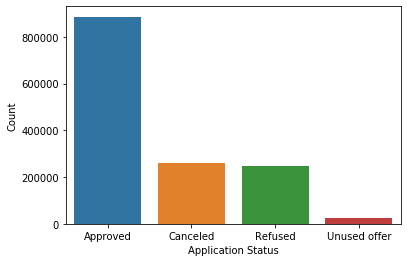

In [166]:
sns.countplot(merged_df.NAME_CONTRACT_STATUS)
plt.xlabel("Application Status")
plt.ylabel("Count")
plt.show()

In [167]:
#Creating different data frames for different CONTRACT_STATUS
Approved = merged_df[merged_df.NAME_CONTRACT_STATUS=='Approved']
Canceled = merged_df[merged_df.NAME_CONTRACT_STATUS=='Canceled']
Refused = merged_df[merged_df.NAME_CONTRACT_STATUS=='Refused']
Unused_offer = merged_df[merged_df.NAME_CONTRACT_STATUS=='Unused offer']

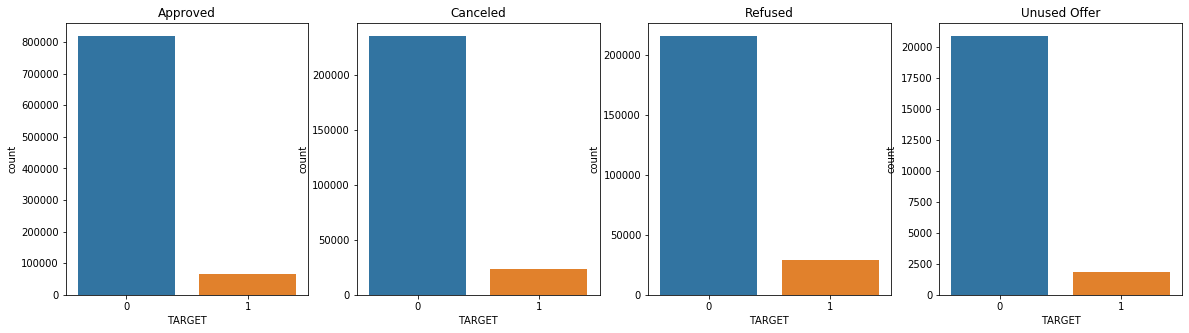

In [168]:
#Plotting TARGET count for each CONTRACT_STATUS
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
plt.title('Approved') 
sns.countplot(x="TARGET",data=Approved)
plt.subplot(1,4,2)
plt.title('Canceled') 
sns.countplot(x="TARGET",data=Canceled)
plt.subplot(1,4,3)
plt.title('Refused') 
sns.countplot(x="TARGET",data=Refused)
plt.subplot(1,4,4)
plt.title('Unused Offer') 
sns.countplot(x="TARGET",data=Unused_offer)

#### Calculating Percentage of defaulter in each contract type

In [169]:
#Percentage of defaulter in each type
percent_defaulter_in_approved = len(Approved[Approved.TARGET==1]) * 100 / len(Approved)
percent_defaulter_in_canceled = len(Canceled[Canceled.TARGET==1]) * 100 / len(Canceled)
percent_defaulter_in_refused = len(Refused[Refused.TARGET==1]) * 100 / len(Refused)
percent_defaulter_in_Unused_offer = len(Unused_offer[Unused_offer.TARGET==1]) * 100 / len(Unused_offer)
print("percent_defaulter_in_approved",percent_defaulter_in_approved)
print("percent_defaulter_in_canceled",percent_defaulter_in_canceled)
print("percent_defaulter_in_refused",percent_defaulter_in_refused)
print("percent_defaulter_in_Unused_offer",percent_defaulter_in_Unused_offer)

percent_defaulter_in_approved 7.588655443691958
percent_defaulter_in_canceled 9.173569327901141
percent_defaulter_in_refused 11.996413871795916
percent_defaulter_in_Unused_offer 8.25172368363269


#### Observation
Refused offers has higher percentage of defaulter

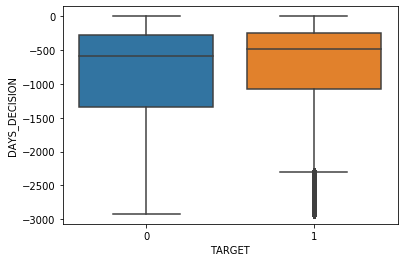

In [170]:
#Plotting boxplot for DAYS_DECISION
sns.boxplot(data=merged_df,y='DAYS_DECISION',x='TARGET')

#### Observation
As days increases in taking decision, defaulter case decreases

**`Inferences:`** 

#### Inferences 1
There is high data imbalance with 91.93% of Non-defaulters and 8.07% of defaulters
#### Inferences 2
Defaulter count is comparatively high for Cash Loans type than Revolving Loans
#### Inferences 3
Percentage of people with higher income is low in defaulter that means person with higher salary has lesser chances of  becoming a defaulter
#### Inferences 4
Percentage of people with higher credit is low in defaulter that means person with higher credit has lesser chances of becoming a defaulter. But a defaulter person with high credit can make bigger loss to bank
#### Inferences 5
Percentage of people with older age is low in defaulter that means old people are more reliable than young in terms of repaying loans.
#### Inferences 6
Income distribution is more for Non-Defualters for amount credit or age.
#### Inferences 7
Refused offers has higher percentage of defaulter
#### Inferences 8
As days increases in taking decision, defaulter case decreases